Ahmed Salah Ahmed Herez

#Perform Data Preparation

In [1]:
#Importing libraries
import numpy as np #linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import re
%matplotlib inline
import seaborn as sns
from datetime import datetime
# To display all the columns of dataframe
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)


In [2]:
# read in csv file as a DataFrame
df=pd.read_csv("startup_funding.csv")

In [3]:
df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


#Clean Data


In [4]:
df.shape

(2372, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372 entries, 0 to 2371
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   SNo               2372 non-null   int64 
 1   Date              2372 non-null   object
 2   StartupName       2372 non-null   object
 3   IndustryVertical  2201 non-null   object
 4   SubVertical       1436 non-null   object
 5   CityLocation      2193 non-null   object
 6   InvestorsName     2364 non-null   object
 7   InvestmentType    2371 non-null   object
 8   AmountInUSD       1525 non-null   object
 9   Remarks           419 non-null    object
dtypes: int64(1), object(9)
memory usage: 185.4+ KB


In [6]:
df.duplicated().sum()

0

In [7]:
df.columns

Index(['SNo', 'Date', 'StartupName', 'IndustryVertical', 'SubVertical',
       'CityLocation', 'InvestorsName', 'InvestmentType', 'AmountInUSD',
       'Remarks'],
      dtype='object')

In [8]:
df.rename(columns={'SNo':'Serial Number','StartupName':'Startup Name','IndustryVertical':'Industry Vertical','SubVertical':'Sub Vertical','CityLocation':'City Location','InvestorsName':'Investors Name','InvestmentType':'Investment Type','AmountInUSD':'Amount'},inplace=True)

In [9]:
df.head()

,Serial Number,Date,Startup Name,Industry Vertical,Sub Vertical,City Location,Investors Name,Investment Type,Amount,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


In [10]:
#drop unnecessary columns
df.drop(columns=['Serial Number', 'Remarks'],inplace=True)

In [11]:
df.head()

,Date,Startup Name,Industry Vertical,Sub Vertical,City Location,Investors Name,Investment Type,Amount
0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000"
1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN
2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN
3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000"
4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000"


In [12]:
df['Amount']

0       1,300,000
1             NaN
2             NaN
3         500,000
4         850,000
          ...    
2367    4,500,000
2368      825,000
2369    1,500,000
2370          NaN
2371      140,000
Name: Amount, Length: 2372, dtype: object

In [13]:
df['Amount']= df['Amount'].apply(lambda x: re.sub(r'[^0-9.]', '', str(x)))

In [14]:
df['Amount'] 

0       1300000
1              
2              
3        500000
4        850000
         ...   
2367    4500000
2368     825000
2369    1500000
2370           
2371     140000
Name: Amount, Length: 2372, dtype: object

In [15]:
df['Amount'] = df['Amount'].apply(lambda x: float(x) if x else float('nan'))

In [16]:
df['Amount']

0       1300000.0
1             NaN
2             NaN
3        500000.0
4        850000.0
          ...    
2367    4500000.0
2368     825000.0
2369    1500000.0
2370          NaN
2371     140000.0
Name: Amount, Length: 2372, dtype: float64

In [17]:
df['Amount']

0       1300000.0
1             NaN
2             NaN
3        500000.0
4        850000.0
          ...    
2367    4500000.0
2368     825000.0
2369    1500000.0
2370          NaN
2371     140000.0
Name: Amount, Length: 2372, dtype: float64

In [18]:
#check null values
df.isnull().sum()

Date                   0
Startup Name           0
Industry Vertical    171
Sub Vertical         936
City Location        179
Investors Name         8
Investment Type        1
Amount               847
dtype: int64

In [19]:
# drop missing values
df.dropna(inplace=True)

In [20]:
#check is any missing value
df.isnull().sum()

Date                 0
Startup Name         0
Industry Vertical    0
Sub Vertical         0
City Location        0
Investors Name       0
Investment Type      0
Amount               0
dtype: int64

Possible questions which could be answered are:

1-How does the funding ecosystem change with time?

2-Do cities play a major role in funding?

3-Which industries are favored by investors for funding?

4-Who are the important investors in the Indian Ecosystem?

5-How much funds does startups generally get in India?

6-how much investers can funding on a particular startup companies?

In [21]:
df.head()

,Date,Startup Name,Industry Vertical,Sub Vertical,City Location,Investors Name,Investment Type,Amount
0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,1300000.0
3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,500000.0
4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,850000.0
5,01/07/2017,Billion Loans,Consumer Internet,Peer to Peer Lending platform,Bangalore,Reliance Corporate Advisory Services Ltd,Seed Funding,1000000.0
6,03/07/2017,Ecolibriumenergy,Technology,Energy management solutions provider,Ahmedabad,"Infuse Ventures, JLL",Private Equity,2600000.0


In [22]:
#convert Date column to datatime type
df['Date'] = pd.to_datetime(df['Date'], format=('%d/%m/%Y'))

In [23]:
#Extract year from Date column and store it in new column "Year"
df['Year']=df['Date'].dt.strftime('%Y')

In [24]:
df.head()

,Date,Startup Name,Industry Vertical,Sub Vertical,City Location,Investors Name,Investment Type,Amount,Year
0,2017-08-01,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,1300000.0,2017
3,2017-08-02,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,500000.0,2017
4,2017-08-02,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,850000.0,2017
5,2017-07-01,Billion Loans,Consumer Internet,Peer to Peer Lending platform,Bangalore,Reliance Corporate Advisory Services Ltd,Seed Funding,1000000.0,2017
6,2017-07-03,Ecolibriumenergy,Technology,Energy management solutions provider,Ahmedabad,"Infuse Ventures, JLL",Private Equity,2600000.0,2017


#EDA

1-How does the funding ecosystem change with time?


In [25]:
#group "Year" and "amount"
funding_year=df.groupby('Year')['Amount'].sum()
funding_year

Year
2016    3.828036e+09
2017    5.846276e+09
Name: Amount, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

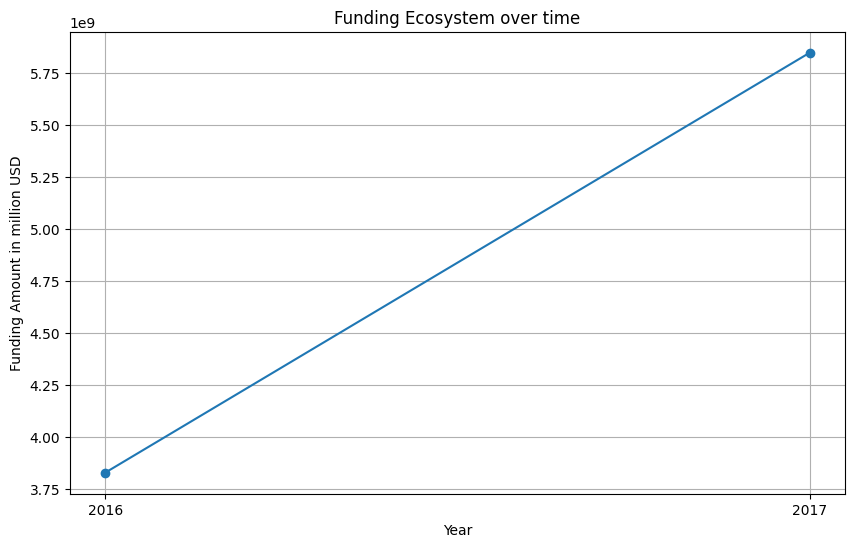

In [26]:
plt.figure(figsize=(10,6))
plt.plot(funding_year.index,funding_year.values,marker='o')
plt.title('Funding Ecosystem over time')
plt.xlabel('Year')
plt.ylabel('Funding Amount in million USD')
plt.grid(True)
plt.xticks(funding_year.index)
plt.show

2-Do cities play a major role in funding?


In [27]:
df.head()

,Date,Startup Name,Industry Vertical,Sub Vertical,City Location,Investors Name,Investment Type,Amount,Year
0,2017-08-01,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,1300000.0,2017
3,2017-08-02,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,500000.0,2017
4,2017-08-02,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,850000.0,2017
5,2017-07-01,Billion Loans,Consumer Internet,Peer to Peer Lending platform,Bangalore,Reliance Corporate Advisory Services Ltd,Seed Funding,1000000.0,2017
6,2017-07-03,Ecolibriumenergy,Technology,Energy management solutions provider,Ahmedabad,"Infuse Ventures, JLL",Private Equity,2600000.0,2017


In [28]:
funding_city=df.groupby('City Location')['Amount'].sum().sort_values(ascending=False)
funding_city

City Location
Bangalore             5.416386e+09
Mumbai                1.339536e+09
Gurgaon               1.079764e+09
New Delhi             9.921245e+08
Pune                  2.276930e+08
Chennai               1.692050e+08
Hyderabad             1.611370e+08
Noida                 1.358180e+08
Ahmedabad             6.982100e+07
Pune/Seattle          1.500000e+07
Bangalore / SFO       1.350000e+07
Kolkata               1.200000e+07
Chandigarh            1.010000e+07
Bangalore/ Bangkok    8.000000e+06
New Delhi / US        4.000000e+06
Jaipur                3.660000e+06
Singapore             3.500000e+06
SFO / Bangalore       2.700000e+06
Vadodara              1.890000e+06
Indore                1.672000e+06
Lucknow               1.000000e+06
Goa                   1.000000e+06
Delhi                 1.000000e+06
Pune / Dubai          1.000000e+06
Panaji                8.250000e+05
Gwalior               5.000000e+05
Coimbatore            4.500000e+05
Missourie             3.500000e+05
Kanpur

In [29]:
top15cities=funding_city.head(15)

<function matplotlib.pyplot.show(close=None, block=None)>

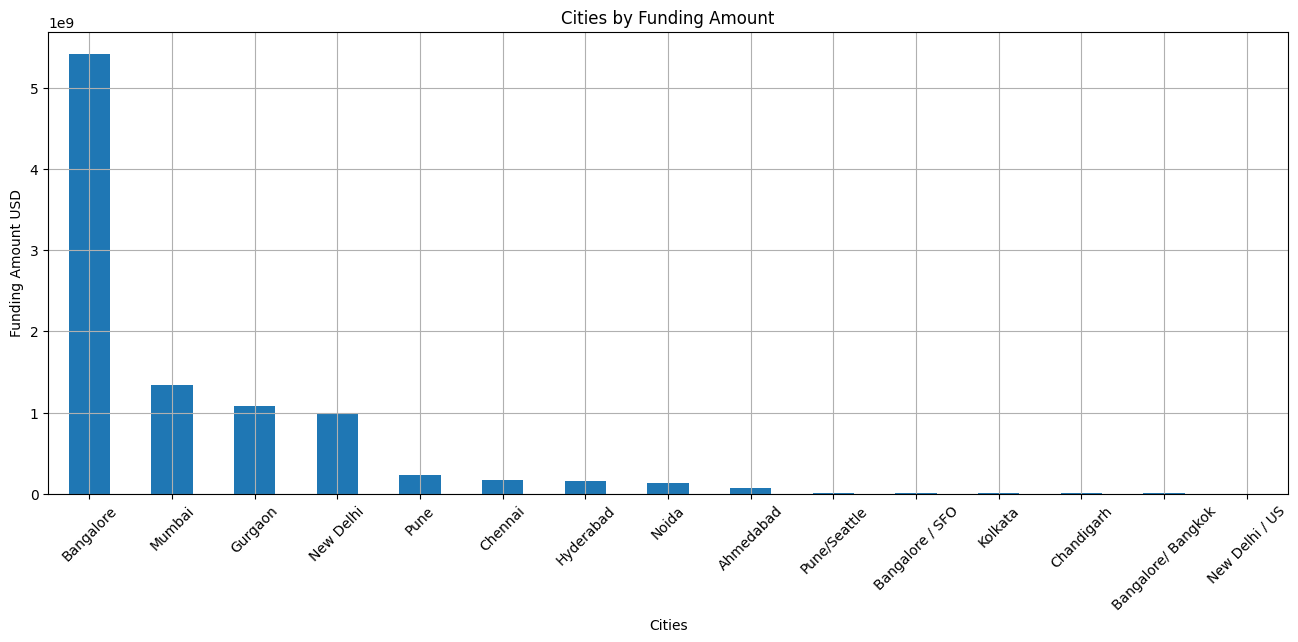

In [30]:
plt.figure(figsize=(16,6))
top15cities.plot(kind='bar')
plt.title('Cities by Funding Amount')
plt.xlabel('Cities')
plt.ylabel('Funding Amount USD')
plt.grid(True)
plt.xticks(rotation=45)
plt.show

3-Which industries are favored by investors for funding?

In [31]:
df.head()

,Date,Startup Name,Industry Vertical,Sub Vertical,City Location,Investors Name,Investment Type,Amount,Year
0,2017-08-01,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,1300000.0,2017
3,2017-08-02,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,500000.0,2017
4,2017-08-02,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,850000.0,2017
5,2017-07-01,Billion Loans,Consumer Internet,Peer to Peer Lending platform,Bangalore,Reliance Corporate Advisory Services Ltd,Seed Funding,1000000.0,2017
6,2017-07-03,Ecolibriumenergy,Technology,Energy management solutions provider,Ahmedabad,"Infuse Ventures, JLL",Private Equity,2600000.0,2017


In [32]:
funding_industries=df.groupby('Industry Vertical')['Amount'].sum().sort_values(ascending=False)
funding_industries

Industry Vertical
Consumer Internet    3.797036e+09
eCommerce            2.432712e+09
ECommerce            1.834398e+09
Technology           1.103594e+09
Logistics            1.806450e+08
Healthcare           9.734300e+07
Education            9.076500e+07
Finance              3.970000e+07
healthcare           3.700000e+07
Food & Beverage      3.373600e+07
Others               1.918800e+07
Real Estate          2.500000e+06
Ecommerce            2.000000e+06
ecommerce            2.000000e+06
Reality              1.000000e+06
FMCG                 5.200000e+05
Food & Beverages     1.750000e+05
Name: Amount, dtype: float64

In [33]:
top15industries=funding_industries.head(15)

<function matplotlib.pyplot.show(close=None, block=None)>

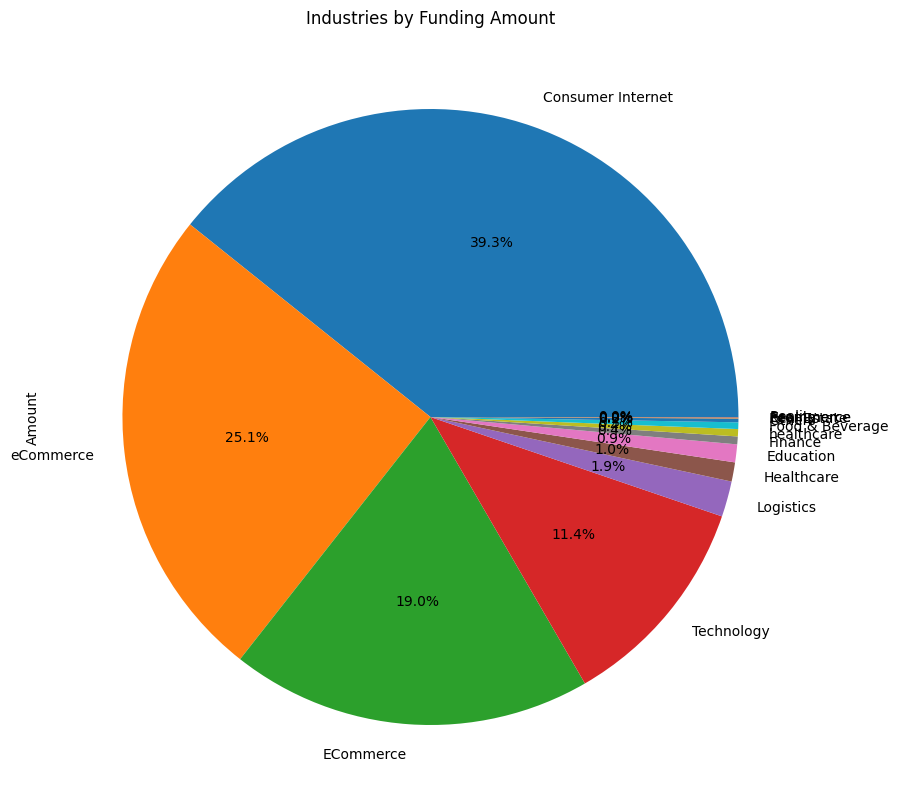

In [34]:
plt.figure(figsize=(18,10))
top15industries.plot(kind='pie',autopct='%1.1f%%')
plt.title('Industries by Funding Amount')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

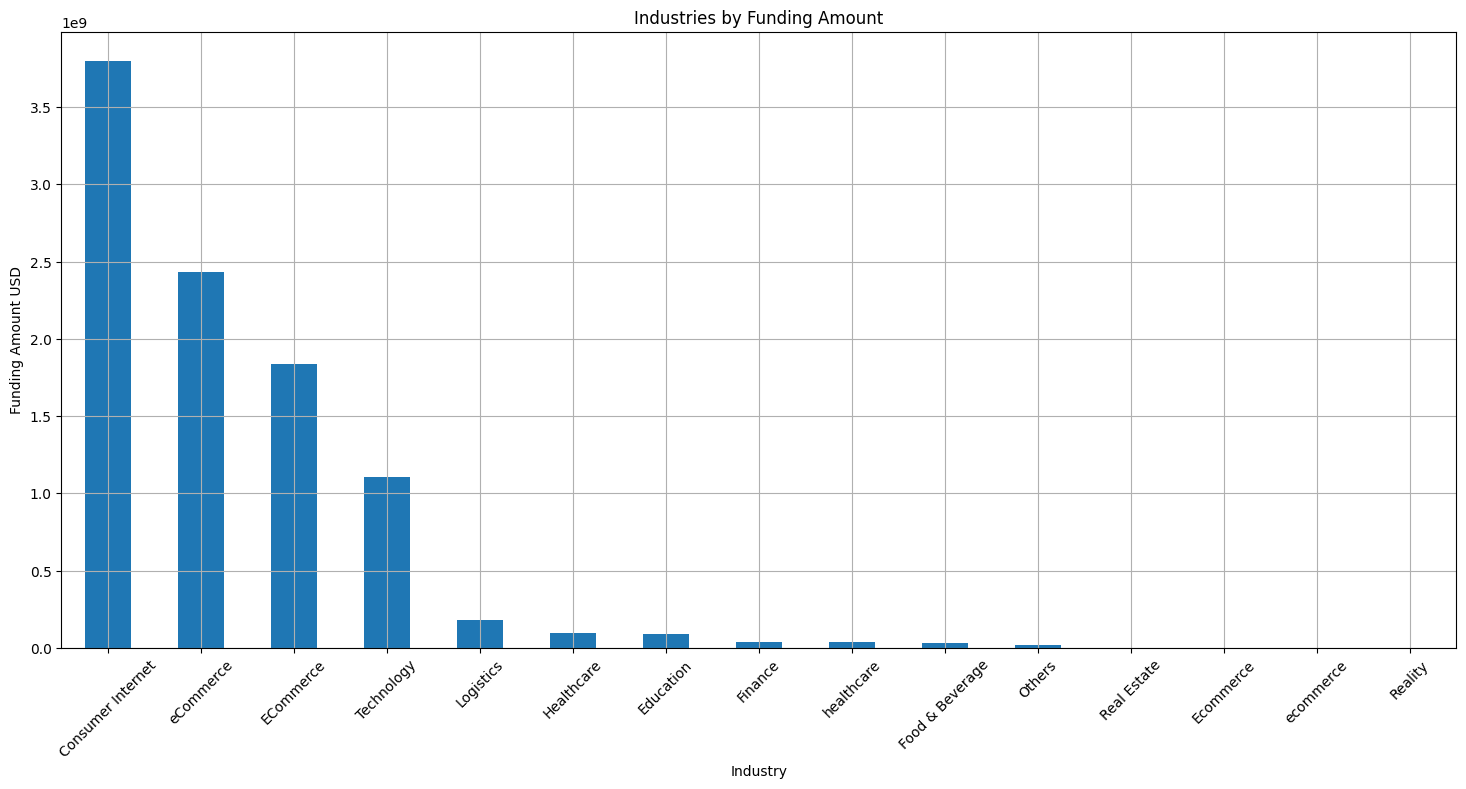

In [35]:
plt.figure(figsize=(18,8))
top15industries.plot(kind='bar')
plt.title('Industries by Funding Amount')
plt.xlabel('Industry')
plt.ylabel('Funding Amount USD')
plt.grid(True)
plt.xticks(rotation=45)
plt.show

4-Who are the important investors in the Indian Ecosystem?

In [36]:
df.head()

,Date,Startup Name,Industry Vertical,Sub Vertical,City Location,Investors Name,Investment Type,Amount,Year
0,2017-08-01,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,1300000.0,2017
3,2017-08-02,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,500000.0,2017
4,2017-08-02,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,850000.0,2017
5,2017-07-01,Billion Loans,Consumer Internet,Peer to Peer Lending platform,Bangalore,Reliance Corporate Advisory Services Ltd,Seed Funding,1000000.0,2017
6,2017-07-03,Ecolibriumenergy,Technology,Energy management solutions provider,Ahmedabad,"Infuse Ventures, JLL",Private Equity,2600000.0,2017


In [37]:
investors=df['Investors Name'].value_counts()
investors

Undisclosed Investors                                              17
Undisclosed investors                                              16
undisclosed investors                                              11
Kalaari Capital                                                     9
Info Edge (India) Ltd                                               7
                                                                   ..
Iron Pillar and IIFL, Blume Ventures, Omidyar Network               1
GMO Japan, Neelesh Bhatnagar                                        1
ABM Knowledgeware                                                   1
V Aanand R                                                          1
Kalaari Capital, Inventus Capital, Tekton Ventures, Kae Capital     1
Name: Investors Name, Length: 716, dtype: int64

In [38]:
top15investors=investors.head(15)

<function matplotlib.pyplot.show(close=None, block=None)>

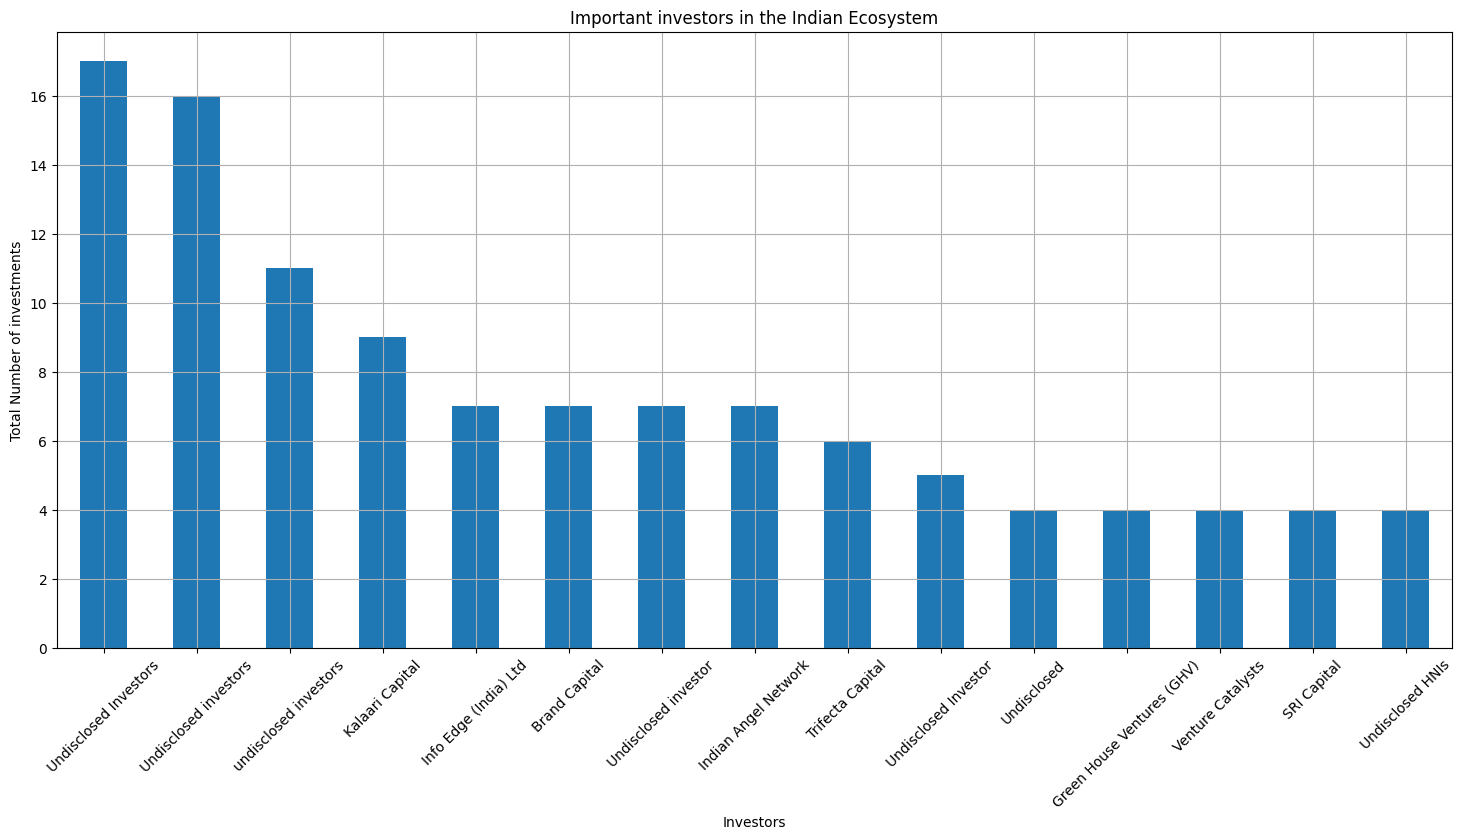

In [39]:
plt.figure(figsize=(18,8))
top15investors.plot(kind='bar')
plt.title('Important investors in the Indian Ecosystem')
plt.xlabel('Investors')
plt.ylabel('Total Number of investments')
plt.grid(True)
plt.xticks(rotation=45)
plt.show

5-How much funds does startups generally get in India?

In [40]:
totalamount=df['Amount'].sum()
totalamount

9674311608.0

6-how much investers can funding on a particular startup companies?

In [41]:
df['Amount'].mean()   

11132694.600690449

In [42]:
df.describe()

,Amount
count,8.690000e+02
mean,1.113269e+07
std,7.134525e+07
min,1.800000e+04
25%,3.500000e+05
50%,1.000000e+06
75%,5.000000e+06
max,1.400000e+09


In [43]:
df['Investment Type'].unique()

array(['Private Equity', 'Seed Funding', 'Debt Funding'], dtype=object)